##Assignment on Linear Regression:
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

Number of hours spent driving (x) | Risk Score on a scale of 0-100 (y)
--- | ---
10 | 95
9 | 80
2 | 10
15 | 50
10 | 45
16 | 98
11 | 38
16 | 93

###Correlation Analysis

---

####Spectrum of Coefficient Analysis
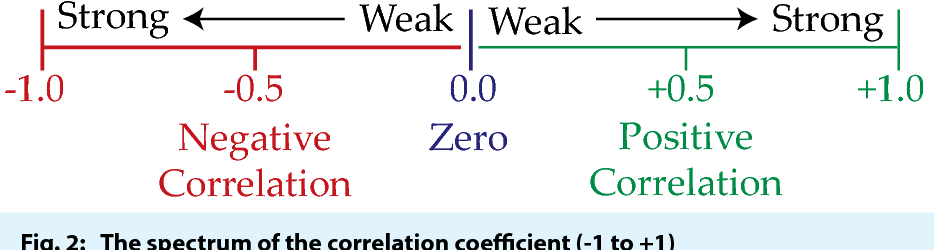

---

####Pearson's Correlation Coefficient
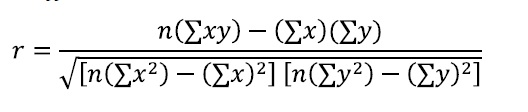

###Fitting the Regression Line

#### $\widehat{Y}$ = $b_{0}$ + $b_{1}$x

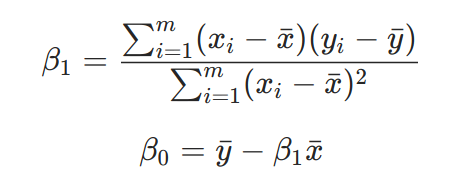

###Evaluating the model - Coefficient of Determination (R2 Score)

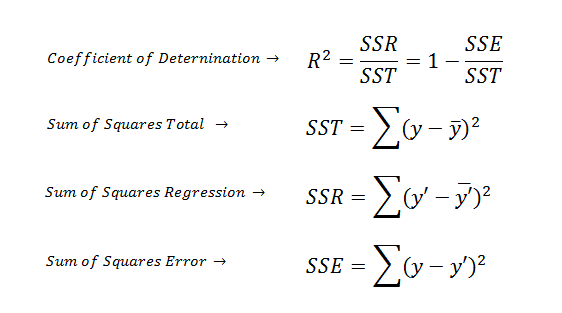

### Source Code

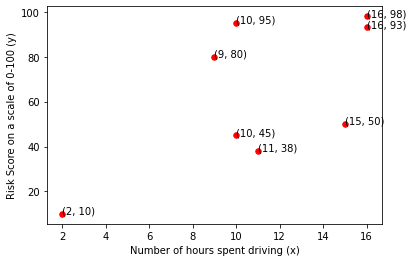

In [1]:
# Correlation Analysis
# Denote Association between two quantitative Variables
# Positive Correlation

import matplotlib.pyplot as plt
X = [10,9,2,15,10,16,11,16]
Y = [95,80,10,50,45,98,38,93]
assert len(X) == len(Y)
m = len(X)
plt.scatter(X,Y,color="red", s=30)
for x,y in zip(X,Y):
  plt.annotate((x,y), (x, y))
plt.xlabel("Number of hours spent driving (x)")
plt.ylabel("Risk Score on a scale of 0-100 (y)")
plt.show()

ML Assignment 1 class created


Get Feature Vector
Datapoints =  [[10, 95], [9, 80], [2, 10], [15, 50], [10, 45], [16, 98], [11, 38], [16, 93]]
X =  [10, 9, 2, 15, 10, 16, 11, 16]
Y =  [95, 80, 10, 50, 45, 98, 38, 93]

Compute Karl Pearson's Coefficient
Karl Pearson's Coefficient Correlation = 0.6611314653759117
Strong Positive Correlation

Training
Strong Correlation, Dataset is fit for Linear Regression
Regression Line Equation : y = 12.584628 + 4.587899*x

R2 Score
R2 Score  =  0.43709481451007637

Sklearn R2 Score
Sklearn R2 Score  =  0.43709481451010035

Plot Graph


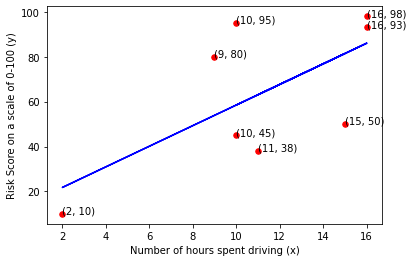

In [2]:
from math import sqrt

class Assignment1:

  # Constructor
  def __init__(self, datapoints):

    print('ML Assignment 1 class created\n')

    X,Y = self.get_feature_vector(datapoints)
    pearson = self.get_pearson(X,Y)
    b0,b1 = self.training(X,Y,pearson)
    r2 = self.get_r2_score(X,Y,b0,b1)
    sklearn_r2 = self.get_sklearn_r2_score(X,Y)
    self.plot_graph(X,Y,b0,b1)


  # Accept Supervised datapoints as input
  def get_feature_vector(self, datapoints):

    print('\nGet Feature Vector\n===========')
    print('Datapoints = ',datapoints)

    X = []
    Y = []

    for x,y in datapoints:

      #upper and lower bound for x
      assert x>=0
      assert x<=16
      assert type(x)==int

      #upper and lower bound for y
      assert y>=0
      assert y<=100
      assert type(y)==int
      
      X.append(x)
      Y.append(y)
    
    print('X = ',X)
    print('Y = ',Y)
    
    return X,Y


  # Determining if Linear Regression is the right 
  def get_pearson(self, X, Y):

    print('\nCompute Karl Pearson\'s Coefficient\n===========')

    sum_x = sum(X)
    sum_y = sum(Y)
    m = len(X)
    sum_xy = 0
    sum_x2 = 0
    sum_y2 = 0
    for x,y in zip(X,Y):
      sum_xy += (x*y)
      sum_x2 += (x*x)
      sum_y2 += (y*y)
    numerator = m*sum_xy - sum_x*sum_y
    denominator = sqrt(m*sum_x2-(sum_x*sum_x))*sqrt(m*sum_y2-(sum_y*sum_y))
    pearson = numerator/denominator

    assert pearson>=-1
    assert pearson<=1

    print('Karl Pearson\'s Coefficient Correlation = {pearson}'.format(pearson=pearson))
    if pearson < -0.5:
      print('Strong Negative Correlation')
    elif pearson < 0:
      print('Weak Negative Correlation')
    elif pearson == 0:
      print('No Correlation')
    elif pearson < 0.5:
      print('Weak Positive Correlation')
    else:
      print('Strong Positive Correlation')
    return pearson


  # Fitting the regression line
  def training(self, X, Y, pearson):

    print('\nTraining\n===========')

    assert pearson>=0.5 or pearson<=-0.5
    print('Strong Correlation, Dataset is fit for Linear Regression')
    
    # Compute b1
    b1_numerator = 0
    b1_denominator = 0
    x_mean = sum(X)/len(X)
    y_mean = sum(Y)/len(Y)
    for x,y in zip(X,Y):
      b1_numerator = b1_numerator + (x-x_mean)*(y-y_mean)
      b1_denominator = b1_denominator + (x-x_mean)*(x-x_mean)
    b1 = b1_numerator/b1_denominator
    
    # Compute b0
    b0 = y_mean-b1*x_mean
    
    # Weight Quantization
    b0, b1 = round(b0,6), round(b1,6)

    print("Regression Line Equation : y = {b0} + {b1}*x".format(b0=b0,b1=b1))
    
    # Return Coefficients
    return b0, b1
  

  # Compute R2 Score
  def get_r2_score(self, X, Y, b0, b1):

    print('\nR2 Score\n===========')
    
    sse = 0 # Residual Sum of Squares
    sst = 0 # Total Sum of Squares
    y_mean = sum(Y)/len(Y)
    for x,y in zip(X,Y):
      y_pred = b0+b1*x
      sse += ( (y-y_pred)*(y-y_pred) )
      sst += ( (y-y_mean)*(y-y_mean) )
    r2 = 1 - (sse/sst)
    print('R2 Score  = ',r2)

    return r2

  
  # Sklearn R2 Score
  def get_sklearn_r2_score(self,X,Y):

    import numpy as np
    from sklearn.linear_model import LinearRegression

    print('\nSklearn R2 Score\n===========')

    X = np.array(X).reshape(-1,1)
    Y = np.array(Y).reshape(-1,1)

    reg = LinearRegression().fit(X, Y)
    r2 = reg.score(X,Y)
    print('Sklearn R2 Score  = ',r2)

    return r2

  def plot_graph(self,X,Y,b0,b1):

    import matplotlib.pyplot as plt

    print('\nPlot Graph\n===========')
    
    plt.scatter(X,Y,color="red", s=30)
    Y_pred = []
    for x,y in zip(X,Y):
      Y_pred.append(b0+b1*x)
      plt.annotate((x,y), (x, y))
    plt.plot(X,Y_pred, color="#0000ff")
    plt.xlabel("Number of hours spent driving (x)")
    plt.ylabel("Risk Score on a scale of 0-100 (y)")
    plt.show()
  

  
# Datapoints for supervisory learning
datapoints = [[10,95],[9,80],[2,10],[15,50],[10,45],[16,98],[11,38],[16,93]]

assignment1 = Assignment1(datapoints)